In [1]:
# Confusion matrix

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
# load result
import pandas
datapath = 'test.xlsx'
datadict = pandas.read_excel(datapath)

In [ ]:
unlrg_path = 

In [5]:
y_labl = np.array(datadict["Type_raw"]) - 1
y_pred = np.array(datadict["Type"]) - 1
# randomly generated a prediction for comparison
y_random = np.random.randint(low=0, high=5, size=y_pred.shape, dtype=int)

In [6]:
labels = tf.placeholder(name="labels",shape=[None,], dtype=tf.int32)
predicts = tf.placeholder(name="predicts", shape=[None,], dtype=tf.int32)

In [7]:
# get confusion matrix
cm = tf.confusion_matrix(
    labels=labels,
    predictions=predicts,
    num_classes=6)

In [8]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

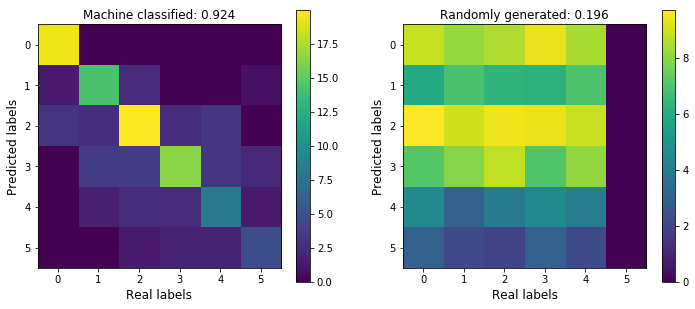

In [9]:
# display
confmat1 = sess.run(cm, feed_dict={labels: y_labl, predicts: y_pred})
confmat2 = sess.run(cm, feed_dict={labels: y_labl, predicts: y_random})

from matplotlib import gridspec

plt.rcParams["figure.figsize"] = [12.0, 5.0]
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])

ax0 = plt.subplot(gs[0])
h = ax0.imshow(np.sqrt(confmat1))
plt.xlabel("Real labels", fontsize=12)
plt.ylabel("Predicted labels", fontsize=12)
plt.colorbar(h)
acc1 = (y_pred-y_labl == 0).sum() / len(y_pred)
plt.title("Machine classified: %.3f" % acc1, fontsize=12)

ax1 = plt.subplot(gs[1])
h = ax1.imshow(np.sqrt(confmat2))
plt.xlabel("Real labels", fontsize=12)
plt.ylabel("Predicted labels", fontsize=12)
plt.colorbar(h)
acc2 = (y_random-y_labl == 0).sum() / len(y_pred)
plt.title("Randomly generated: %.3f" % acc2, fontsize=12)